In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
#importing the data
data_train, data_test,data_ = pd.read_csv('train.csv'),pd.read_csv('test.csv'),pd.read_csv('gender_submission.csv')

# EXPLORING THE DATA

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


### MERGING 'survived' column to TEST DATA

In [68]:
data_test.insert(11, 'Survived', data_['Survived'],True)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


# DATA CLEANING

## Finding missing value

In [10]:
def count_missing_value(data):
    length = len(data)
    null_count = data.isnull().sum()
    nan_count = ((data=='nan') | (data=='NaN') | (data=='Nan')).sum()
    empty_count = ((data=='') | (data==' ')).sum()
    null_percent = (null_count/ length)* 100
    nan_percent = (nan_count/ length)*100
    empty_percent = (empty_count/ length)*100
    show = pd.DataFrame({'null_count' : null_count,
                         'null_percent' : null_percent,
                         'nan_count' : null_count,
                         'nan_percent' : nan_percent,
                         'empty_count' : empty_count,
                         'empty_percent' : empty_percent
                        })
    return show

In [11]:
print('Missing value of TRAINING DATA : \n')
count_missing_value(data_train)

Missing value of TRAINING DATA : 



,null_count,null_percent,nan_count,nan_percent,empty_count,empty_percent
PassengerId,0,0.000000,0,0.0,0,0.0
Survived,0,0.000000,0,0.0,0,0.0
Pclass,0,0.000000,0,0.0,0,0.0
Name,0,0.000000,0,0.0,0,0.0
Sex,0,0.000000,0,0.0,0,0.0
Age,177,19.865320,177,0.0,0,0.0
SibSp,0,0.000000,0,0.0,0,0.0
Parch,0,0.000000,0,0.0,0,0.0
Ticket,0,0.000000,0,0.0,0,0.0
Fare,0,0.000000,0,0.0,0,0.0


In [12]:
print('Missing value of TEST DATA : \n')
count_missing_value(data_test)

Missing value of TEST DATA : 



,null_count,null_percent,nan_count,nan_percent,empty_count,empty_percent
PassengerId,0,0.000000,0,0.0,0,0.0
Pclass,0,0.000000,0,0.0,0,0.0
Name,0,0.000000,0,0.0,0,0.0
Sex,0,0.000000,0,0.0,0,0.0
Age,86,20.574163,86,0.0,0,0.0
SibSp,0,0.000000,0,0.0,0,0.0
Parch,0,0.000000,0,0.0,0,0.0
Ticket,0,0.000000,0,0.0,0,0.0
Fare,1,0.239234,1,0.0,0,0.0
Cabin,327,78.229665,327,0.0,0,0.0


As we can see, 'Cabin' column has almost 3/4th empty data which might affect our result, so, we'll rempve it.

The 'Age' has only 1/5th empty data. We can replace the empty data with either mean, median or mode.

And since, 'Fare' and 'Embarked' has only few empty value, so, we can remove it too.

In [69]:
data_train= data_train.drop(labels = ['Cabin'], axis= 1)
data_test= data_test.drop(labels = ['Cabin'], axis= 1)

### Filling the empty rows

In [70]:
age_train_median= data_train['Age'].median()
age_test_median= data_test['Age'].median()

data_train['Age'].fillna(age_train_median, inplace= True)
data_test['Age'].fillna(age_test_median, inplace= True)

### Finding the location of empty row

In [71]:
location_test= data_test.loc[data_test['Fare'].isnull()]
location_train= data_train.loc[data_train['Embarked'].isnull()]

print(location_test)
print(location_train)

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Embarked  Survived  
152   NaN        S         0  
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN  


In [72]:
data_train= data_train.drop(labels=[61, 829], axis=0)
data_test= data_test.drop(labels=[152], axis=0)

### Re-checking for missing value

In [73]:
count_missing_value(data_train)

,null_count,null_percent,nan_count,nan_percent,empty_count,empty_percent
PassengerId,0,0.0,0,0.0,0,0.0
Survived,0,0.0,0,0.0,0,0.0
Pclass,0,0.0,0,0.0,0,0.0
Name,0,0.0,0,0.0,0,0.0
Sex,0,0.0,0,0.0,0,0.0
Age,0,0.0,0,0.0,0,0.0
SibSp,0,0.0,0,0.0,0,0.0
Parch,0,0.0,0,0.0,0,0.0
Ticket,0,0.0,0,0.0,0,0.0
Fare,0,0.0,0,0.0,0,0.0


In [74]:
count_missing_value(data_test)

,null_count,null_percent,nan_count,nan_percent,empty_count,empty_percent
PassengerId,0,0.0,0,0.0,0,0.0
Pclass,0,0.0,0,0.0,0,0.0
Name,0,0.0,0,0.0,0,0.0
Sex,0,0.0,0,0.0,0,0.0
Age,0,0.0,0,0.0,0,0.0
SibSp,0,0.0,0,0.0,0,0.0
Parch,0,0.0,0,0.0,0,0.0
Ticket,0,0.0,0,0.0,0,0.0
Fare,0,0.0,0,0.0,0,0.0
Embarked,0,0.0,0,0.0,0,0.0


# Encoding the categorical values

In [75]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
obj_col = ['Sex', 'Embarked', 'Ticket','Name']
for i in obj_col:
    data_test[i] = le.fit_transform(data_test[i])
    data_train[i] = le.fit_transform(data_train[i])

In [76]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,206,1,34.5,0,0,152,7.8292,1,0
1,893,3,402,0,47.0,1,0,221,7.0000,2,1
2,894,2,269,1,62.0,0,0,73,9.6875,1,0
3,895,3,407,1,27.0,0,0,147,8.6625,2,0
4,896,3,178,0,22.0,1,1,138,12.2875,2,1


In [77]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,522,7.2500,2
1,2,1,1,190,0,38.0,1,0,595,71.2833,0
2,3,1,3,353,0,26.0,0,0,668,7.9250,2
3,4,1,1,272,0,35.0,1,0,48,53.1000,2
4,5,0,3,15,1,35.0,0,0,471,8.0500,2


## Observing the correlation among variables

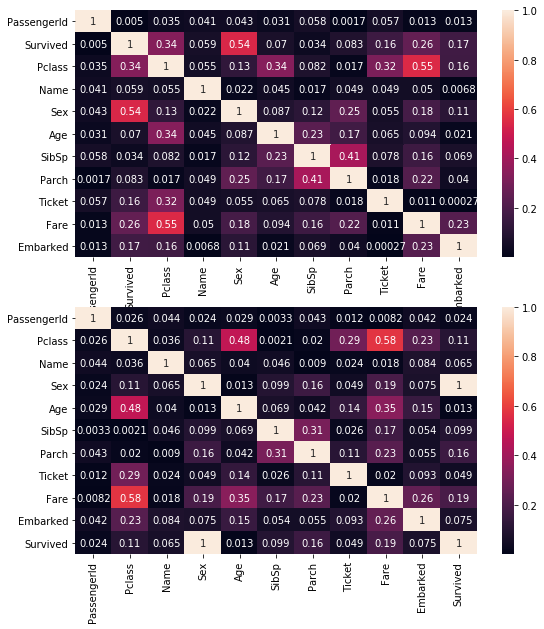

In [22]:
fig , (ax1, ax2)= plt.subplots(2,1, figsize=(9,10))
sns.heatmap(data_train.corr().abs(), annot= True, ax= ax1)
sns.heatmap(data_test.corr().abs(), annot= True, ax= ax2)

## Removing less correlated columns

In [78]:
data_train= data_train.drop(labels = ['Name','PassengerId','SibSp'], axis= 1)
data_test_= data_test.drop(labels = ['Name','PassengerId','SibSp'], axis= 1)

# DATA VISUALISATION

In [24]:
women = pd.concat([data_test[data_test['Sex']==0] , data_train[data_train['Sex']==0]])
men = pd.concat([data_test[data_test['Sex']==1] , data_train[data_train['Sex']==1]])

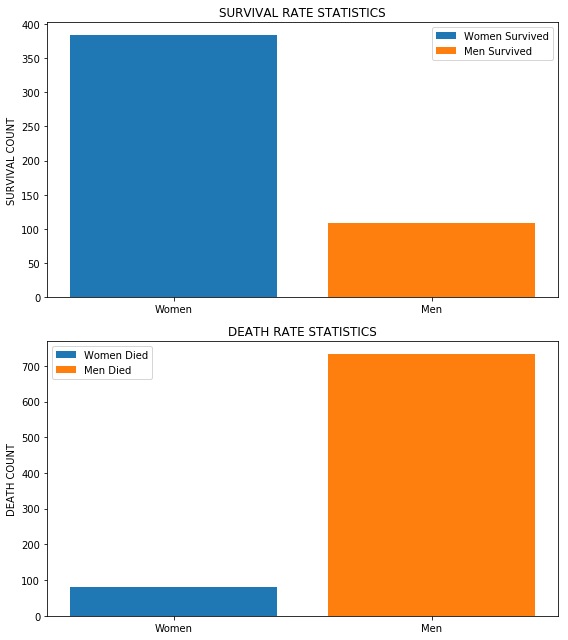

In [25]:
fig, ax = plt.subplots(2,1 ,figsize=(8,9))

ax[0].bar('Women',len(women[women['Survived']==1]), label='Women Survived')
ax[0].bar('Men',len(men[men['Survived']==1]), label='Men Survived')
ax[0].set(title='SURVIVAL RATE STATISTICS', ylabel='SURVIVAL COUNT')
ax[0].legend()

ax[1].bar('Women',len(women[women['Survived']==0]), label='Women Died')
ax[1].bar('Men',len(men[men['Survived']==0]), label='Men Died')
ax[1].set(title='DEATH RATE STATISTICS', ylabel='DEATH COUNT')
ax[1].legend()

plt.tight_layout()
plt.show()

From the above bar graphs, it is clear that the suvival rate of women is much higher than that of men.

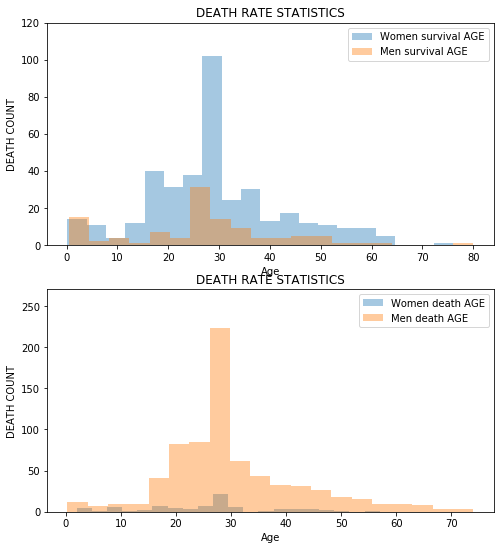

In [26]:
fig, ax = plt.subplots(2,1, figsize=(8,9))

sns.distplot(women[women['Survived']==1].Age, kde=False, bins=20, ax=ax[0], label='Women survival AGE')
sns.distplot(men[men['Survived']==1].Age, kde=False, bins=20, ax=ax[0], label='Men survival AGE')
ax[0].set(title='DEATH RATE STATISTICS', ylabel='DEATH COUNT', ylim=(0,120))
ax[0].legend()

sns.distplot(women[women['Survived']==0].Age, kde=False, bins=20, ax=ax[1], label='Women death AGE')
sns.distplot(men[men['Survived']==0].Age, kde=False, bins=20, ax=ax[1], label='Men death AGE')
ax[1].set(title='DEATH RATE STATISTICS', ylabel='DEATH COUNT', ylim=(0,270))
ax[1].legend()

plt.show()

Majority of the men dying are between the age of 16-47 years and, for women it is 17-32 years(though the count is very low as compared to men).

Majority of the women surviving are between the age of 16-47 years and, for men it is 24-32 years.

In [79]:
x_train= data_train.drop(labels= ['Survived'], axis= 1)
y_train= data_train['Survived']
x_test= data_test_.drop(labels= ['Survived'], axis= 1)
y_test= data_test_['Survived']

# PREDICTING THE RESULT
## REGRESSOR vs CLASSIFIER

In [28]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

k_fold= KFold(n_splits= 3, random_state= 42)

In [29]:
algos1= {
        'Logistic Regression ' : {'model': LogisticRegression(),
                                 'para' : {'penalty': ['l1', 'l2'], 'C':[1,2,7,10]}
                                 },
        'KNN'                  : {'model' : KNeighborsClassifier(),
                                'para': {'n_neighbors': np.arange(1,38,3), 'weights': ['distance', 'uniform']}
                                 }
        
        }

In [30]:
algos2= {
        'Random Forest Classifier' : {'model' : RandomForestClassifier(),
                                      'para' :{'criterion': ['gini', 'entropy'],'n_estimators':[10,25,50,100,200,250,400,500],
                                               'max_depth' : [1,2,4,7],'max_features': ['auto', 'sqrt', 'log2'] }
                                     },
        'Random Forest Regressor' : {'model' : RandomForestRegressor(),
                                     'para' :{'criterion' : ['mse', 'mae'],'max_depth' : [1,2,5,7],
                                              'n_estimators':[10,25,50,100,200,250,400,500],
                                              'max_features': ['auto', 'sqrt', 'log2']}
                                    }
        }

In [31]:
algos3= {
        'Decision Tree Classifier' : {'model' : DecisionTreeClassifier(),
                                      'para' : {'splitter': ['best', 'random'],'criterion': ['gini', 'entropy'],
                                               'min_samples_split':[2,5,7]}
                                     },
        
        'Decision Tree Regressor' : {'model' : DecisionTreeRegressor(),
                                    'para' : {'criterion': ['mse', 'mae', 'friedman_mse'],
                                             'splitter': ['best', 'random'],'min_samples_split':[2,5,10,7]}
                                    }
        }

## LOGISTIC REGRESSOR & KNN

In [32]:
score1 = []
for algo, param in algos1.items():
    grid1= GridSearchCV(param['model'], param['para'], cv= k_fold)
    grid1.fit(x_train, y_train) #to  measure the time taken to fit the data.
    y_pred= grid1.predict(x_test)
    
    score1.append(pd.Series({
                'Estimator' : algo,
                'best parameter' : grid1.best_params_,
                'best score' : grid1.best_score_
                }))

## RANDOM FOREST REGRESSOR/ CLASSIFIER

In [33]:
score2 = []
for algo, param in algos2.items():
    grid2= GridSearchCV(param['model'], param['para'], cv= k_fold)
    grid2.fit(x_train, y_train) #to  measure the time taken to fit the data.
    y_pred= grid2.predict(x_test)
    
    score2.append(pd.Series({
                'Estimator' : algo,
                'best parameter' : grid2.best_params_,
                'best score' : grid2.best_score_
                }))

## DECISION TREE REGRESSOR/ CLASSIFIER

In [34]:
score3 = []
for algo, param in algos3.items():
    grid3= GridSearchCV(param['model'], param['para'], cv= k_fold)
    grid3.fit(x_train, y_train) #to  measure the time taken to fit the data.
    y_pred= grid3.predict(x_test)
    
    score3.append(pd.Series({
                'Estimator' : algo,
                'best parameter' : grid3.best_params_,
                'best score' : grid3.best_score_
                }))

In [35]:
# to show the complete row
pd.options.display.max_colwidth=100

In [36]:
# making the dataframe

best_result1 = pd.concat(score1, axis=1).T.set_index('Estimator')    
best_result2 = pd.concat(score2, axis=1).T.set_index('Estimator')
best_result3 = pd.concat(score3, axis=1).T.set_index('Estimator')

In [37]:
best_result1

,best parameter,best score
Estimator,,
Logistic Regression,"{'C': 1, 'penalty': 'l2'}",0.790776
KNN,"{'n_neighbors': 37, 'weights': 'distance'}",0.712036


In [38]:
best_result2

,best parameter,best score
Estimator,,
Random Forest Classifier,"{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 10}",0.821147
Random Forest Regressor,"{'criterion': 'mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}",0.437377


In [39]:
best_result3

,best parameter,best score
Estimator,,
Decision Tree Classifier,"{'criterion': 'gini', 'min_samples_split': 7, 'splitter': 'random'}",0.794151
Decision Tree Regressor,"{'criterion': 'friedman_mse', 'min_samples_split': 10, 'splitter': 'random'}",0.224413


As we can see, 'Logistic Regression' , 'Decision Tree Classifier' & 'Random Forest Classifier' gives the top 3 results. But, 

'Random Forest Classifier' comes at the top with the best result among all the estimators!

# -------------------------------------      ## END ##    ---------------------------------------------

In [80]:
rf= RandomForestClassifier(criterion= 'entropy', max_depth= 7, max_features= 'sqrt', n_estimators= 10)
rf.fit(x_train,y_train)
y_pred_= rf.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_,y_test)

0.9160671462829736

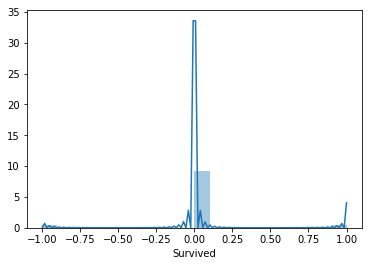

In [82]:
sns.distplot(y_test-y_pred_)

In [64]:
print(y_pred_.toframe())

AttributeError: 'numpy.ndarray' object has no attribute 'toframe'

In [84]:
submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
#        "Survived": Y_pred
        "Survived": y_pred_
    })
submission.to_csv('titanic_result.csv', index=False)